In [6]:
import ipywidgets as widgets
uploaderA = widgets.FileUpload(
    description='选择图片A',
    accept='image/*',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)
uploaderB = widgets.FileUpload(
    description='选择图片B',
    accept='image/*',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)
display(uploaderA,uploaderB)

FileUpload(value=(), accept='image/*', description='选择图片A')

FileUpload(value=(), accept='image/*', description='选择图片B')

In [7]:
uploaded_fileA = uploaderA.value[0]
uploaded_fileB = uploaderB.value[0]
valueA = uploaded_fileA.content
valueB = uploaded_fileB.content
imageA = widgets.Image(value=valueA.tobytes(), width=300, height=300)
imageB = widgets.Image(value=valueB.tobytes(), width=300, height=300)

sidebyside = widgets.HBox([imageA, imageB])
display(sidebyside)


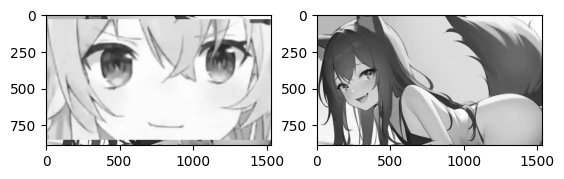

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imageA = np.asarray(valueA, dtype="uint8")
imageA = cv2.imdecode(imageA, cv2.IMREAD_COLOR)
grey_imgA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)

imageB = np.asarray(valueB, dtype="uint8")
imageB = cv2.imdecode(imageB, cv2.IMREAD_COLOR)
grey_imgB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 1)
plt.imshow(grey_imgA,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(grey_imgB,cmap="gray")

IntSlider(value=128, continuous_update=False, description='灰度分界：', max=255)

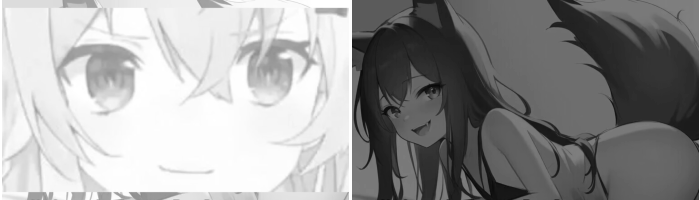

In [9]:
%matplotlib widget
int_range = widgets.IntSlider(
    value=128,
    min=0,
    max=255,
    step=1,
    description='灰度分界：',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
fig1, ax1 = plt.subplots(1, 2,figsize=(7,2))
fig1.canvas.toolbar_visible = False
fig1.canvas.header_visible = False
fig1.canvas.footer_visible = False
fig1.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
ax1[0].axis('off')
imgA = ax1[0].imshow(grey_imgA,cmap="gray")
ax1[1].axis('off')
imgB = ax1[1].imshow(grey_imgB,cmap="gray")

def on_value_change(change):
    global grey_imgAA,grey_imgBB
    a=change['new']
    
    grey_imgAuint16=grey_imgA.astype('uint16')
    grey_imgBuint16=grey_imgB.astype('uint16')
    
    grey_imgAA=np.round((255-a)*grey_imgAuint16/255+a).astype('uint8')
    grey_imgBB=np.round(a*grey_imgBuint16/255).astype('uint8')
    
    imgA.set_data(grey_imgAA)
    imgB.set_data(grey_imgBB)
    #fig1.canvas.draw_idle()
    #clear_output(wait=True)
int_range.observe(on_value_change, names='value')
display(int_range)
on_value_change({'new':128})

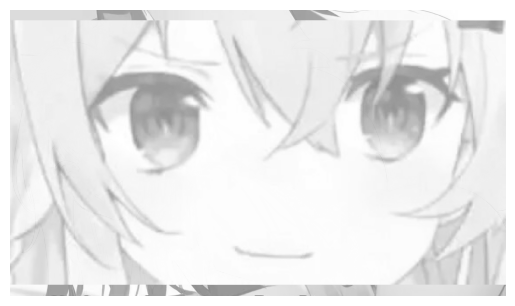

In [12]:
%matplotlib inline
# grey_imgAA
# grey_imgBB
plt.close()
#plt.figure()
alpha=255-grey_imgAA+grey_imgBB
pixel_o=np.round(grey_imgBB/alpha*255).astype('uint8')
rgba=cv2.merge([pixel_o,pixel_o,pixel_o,alpha])
#plt.gca().xaxis.set_major_locator(plt.NullLocator()) 
#plt.gca().yaxis.set_major_locator(plt.NullLocator()) 
#plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
plt.axis('off')
plt.imshow(rgba)

plt.savefig('output.png',transparent=True,pad_inches=0.0,bbox_inches='tight')